In [1]:
#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load the dataset
data = pd.read_csv("tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management
data_clean = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)

#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'SCHCONN1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

target = data_clean.ESTEEM1 #SCHCONN1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### standardize predictors to have mean=0 and sd=1

In [3]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['SCHCONN1']=preprocessing.scale(predictors['SCHCONN1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

### specify the lasso regression model

In [4]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'AGE': -0.039188661115392341,
 'ALCEVR1': 0.044415128204794915,
 'ALCPROBS1': 0.0,
 'ASIAN': -0.18975956762376395,
 'BLACK': 1.5663916535443703,
 'CIGAVAIL': -0.010868735417911337,
 'COCEVER1': 0.085633207941317416,
 'DEP1': -1.390711029337385,
 'DEVIANT1': 0.0,
 'EXPEL1': -0.058724395239031876,
 'FAMCONCT': 1.3224507178168934,
 'GPA1': 0.21117784368812367,
 'HISPANIC': 0.0,
 'INHEVER1': -0.20844478005576361,
 'MALE': 0.76518452108321022,
 'MAREVER1': 0.1341952177026752,
 'NAMERICAN': -0.011131079859529432,
 'PARACTV': 0.35136314206778818,
 'PARPRES': -0.12805173305729317,
 'PASSIST': 0.0,
 'SCHCONN1': 1.0823943249731738,
 'VIOL1': 0.36604326329618248,
 'WHITE': 0.0}

### plot coefficient progression

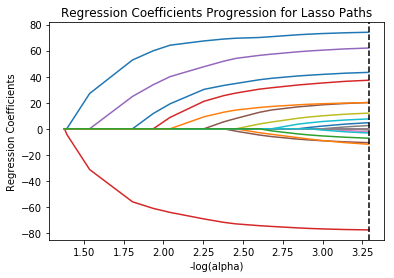

In [5]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

### plot mean square error for each fold

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


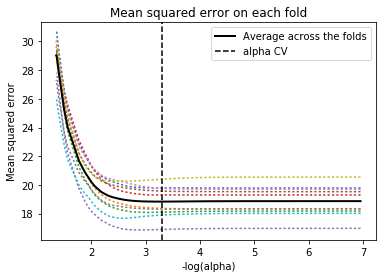

In [6]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

### MSE from training and test data

In [7]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE', train_error)
print ('test data MSE', test_error)

training data MSE 18.5752656052
test data MSE 19.3572343864


### R-square from training and test data

In [8]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square', rsquared_train)
print ('test data R-square', rsquared_test)

training data R-square 0.359869541137
test data R-square 0.326042208246


We get a not bad result in predicting **ESTEEM1**